# Lab 1 - arytmetyka komputerowa

Zadanie 1. Porównać w języku Julia reprezentację bitową liczby 1/3 dla Float32, Float64 oraz liczby, która jest inicjalizowana jako Float32, a potem rzutowana na Float64.

In [1]:
bitstring(Float32(1/3))

"00111110101010101010101010101011"

In [2]:
bitstring(Float64(1/3))

"0011111111010101010101010101010101010101010101010101010101010101"

In [3]:
bitstring(Float64(Float32(1/3)))

"0011111111010101010101010101010101100000000000000000000000000000"

Zadanie 2. Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi reprezentowanymi w komputerze za pomocą języka Julia. Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu od 1.0 do 1000.0 z krokiem 1.0.

In [4]:
a=Float32(1.0)
b=Float32(1000.0)
tab=Float32[]
for x in a:b
    push!(tab, nextfloat(x)-x)
end
map(x->x,tab)

1000-element Array{Float32,1}:
 1.1920929e-7
 2.3841858e-7
 2.3841858e-7
 4.7683716e-7
 4.7683716e-7
 4.7683716e-7
 4.7683716e-7
 9.536743e-7 
 9.536743e-7 
 9.536743e-7 
 9.536743e-7 
 9.536743e-7 
 9.536743e-7 
 ⋮           
 6.1035156e-5
 6.1035156e-5
 6.1035156e-5
 6.1035156e-5
 6.1035156e-5
 6.1035156e-5
 6.1035156e-5
 6.1035156e-5
 6.1035156e-5
 6.1035156e-5
 6.1035156e-5
 6.1035156e-5

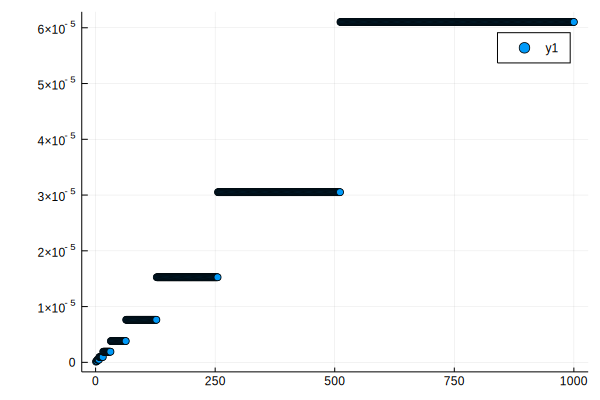

In [7]:
using Plots

scatter(1.0:1.0:1000.0, tab)

Zadanie 3. Jedną z bibliotek numerycznych, jaką będziemy używać na zajęciach jest GSL (język C). Korzystając ze wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

In [56]:
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>

int main (void)
{
  float f = 1.1;

  for (int i=1; i< 150; i++){

    printf ("f = "); gsl_ieee_printf_float(&f);
    printf ("\n");
    f = f/(2.0);
  }
  return 0;
}

LoadError: syntax: extra token "main" after end of expression

Zadanie 4. Wymyślić własny przykład algorytmu niestablinego numerycznie.

In [8]:
x = Float64(0.000000001)

y = sqrt(x*x+1) - 1

y

0.0

Przy x~0 wynik jest zaburzony. Algorytm można poprawić, stosując wzory skróconego mnożenia

In [9]:
y1 = (x*x) / (sqrt(x*x+1) + 1)

y1

5.0e-19